# TP1 (Student version)

We can use the following libraries.

In [1]:
import matplotlib.pyplot as plt
import math
import sys
print(sys.version)

3.8.10 (default, Nov 26 2021, 20:14:08) 
[GCC 9.3.0]


## Exercise 1: get things started

### Question 1

Create manually a few graphs (with approximately a dozen nodes) and store them in the format (for each line):

x y 

You will use them to test your codes.

### Question 2

Download the following graphs:

http://snap.stanford.edu/data/email-Eu-core.html

http://snap.stanford.edu/data/com-Amazon.html

http://snap.stanford.edu/data/com-LiveJournal.html

Also, download the graph email_data_ebel.txt from http://lioneltabourier.fr/teaching_en.html

All these graphs allow you to check the results of your programs.


### Question 3

Make a program which reads a graph from a text file and counts the number of nodes and edges in a graph (without storing it in memory). If a same link appears several times, it will be counted as many times.

In [8]:
def count_node_link(file_name):
    nodes, count_nodes, count_edges = set(), 0, 0
    with open(file_name, "r") as graph_file:
        for line in graph_file:
            node1, node2 = [int(node) for node in line.split()]
            if node1 not in nodes:
                count_nodes += 1
                nodes.add(node1)
            if node2 not in nodes:
                count_nodes += 1
                nodes.add(node2)
            count_edges += 1
    return count_nodes, count_edges

In [9]:
print(count_node_link("email-Eu-core.txt"))

(1005, 25571)


### Question 4

Make a program which counts the degree (i.e. the number of edges) of a node of a graph (without storing it in memory). If a same link appears several times, it will increase the degree by as many times. In case of a self-loop, the degree is increased once.

In [10]:
def compute_degree(file_name, node):
    degree = 0
    with open(file_name, "r") as graph_file:
        for line in graph_file:
            node1, node2 = [int(node) for node in line.split()]
            if node1 == node:
                degree += 1
            if node2 == node and node2 != node1:
                degree +=1
    return degree

In [11]:
print(compute_degree("email-Eu-core.txt", 1))

51


## Exercise 2: loading a graph in memory

### Question 5

Make a program which reads a graph from a text file and load it as a python dictionary of lists. 
This implementation of the adjacency list format will be the standard format that we will use to store a graph in this course.

In [12]:
def graph_from_file(file_name):
    graph = {}
    with open(file_name, "r") as graph_file:
        for line in graph_file:
            node1, node2 = [int(node) for node in line.split()]
            if node1 not in graph:
                graph[node1] = []
            graph[node1].append(node2)
            if node2 not in graph:
                graph[node2]= []
            graph[node2].append(node1)
    return graph
    

In [14]:
import json
print(json.dumps(graph_from_file("email-Eu-core.txt"), indent = 4))

{
    "0": [
        1,
        17,
        316,
        316,
        146,
        146,
        581,
        268,
        581,
        221,
        218,
        18,
        734,
        734,
        18,
        178,
        178,
        380,
        0,
        0,
        459,
        215,
        221,
        250,
        148,
        250,
        73,
        74,
        248,
        498,
        498,
        226,
        101,
        377,
        218,
        377,
        17,
        74,
        177,
        177,
        248,
        103,
        103,
        560,
        560,
        215,
        309,
        88,
        88,
        73,
        5,
        5,
        297,
        309,
        313,
        223,
        223,
        238,
        238,
        459,
        368,
        266,
        222,
        222,
        283,
        283,
        6,
        64,
        6,
        65,
        166,
        166,
        120
    ],
    "1": [
        0,
        74,
        17,
        316,

### Question 6

Make a program that deletes the self-loops and duplicated edges existing in the graph and writes it in a new text file. 

In [33]:
def remove_loop_dupes(graph):
    for node in graph:
        graph[node] = list(dict.fromkeys(graph[node]))
        try:
            graph[node].remove(node)
        except ValueError:
            pass
def graph_to_file(graph, file_name):
    with open(file_name, "w") as graph_file:
        for node1 in graph:
            for node2 in graph[node1]:
                graph_file.write("{} {}\n".format(node1, node2))
                

In [34]:
email_graph = graph_from_file("email-Eu-core.txt")
remove_loop_dupes(email_graph)
graph_to_file(email_graph, "test.txt")

### Question 7

Try the data structure of Question 5 on various graphs downloaded in Question 2. Conclude on the scalability (what graph size can you handle with this data structure).

## Exercise 3: degree distribution

### Question 8
Create a program which computes the degree distribution of a graph, store it in a python dictionary of the form:

deg: number of occurrences

In [37]:
def compute_degree_dist(graph):
    degree_dist = {}
    for node in graph:
        degree = len(graph[node])
        if degree not in degree_dist:
            degree_dist[degree] = 0
        degree_dist[degree] += 1
    return degree_dist

In [38]:
compute_degree_dist(graph_from_file("email-Eu-core.txt"))

{73: 4,
 52: 3,
 161: 1,
 118: 4,
 163: 2,
 280: 1,
 202: 1,
 116: 3,
 62: 7,
 60: 8,
 75: 5,
 134: 1,
 96: 5,
 233: 1,
 128: 1,
 82: 6,
 115: 1,
 167: 1,
 88: 6,
 120: 1,
 240: 1,
 27: 12,
 132: 1,
 63: 7,
 50: 8,
 53: 5,
 174: 1,
 94: 3,
 112: 2,
 55: 3,
 43: 10,
 49: 14,
 97: 4,
 54: 11,
 70: 3,
 101: 2,
 140: 2,
 117: 3,
 19: 11,
 175: 2,
 76: 5,
 84: 3,
 23: 10,
 110: 5,
 42: 6,
 58: 9,
 90: 5,
 71: 2,
 80: 8,
 114: 3,
 218: 2,
 91: 4,
 369: 1,
 249: 1,
 124: 6,
 46: 10,
 15: 14,
 79: 9,
 28: 13,
 29: 6,
 12: 10,
 158: 1,
 32: 15,
 37: 14,
 35: 6,
 119: 1,
 181: 1,
 348: 1,
 205: 1,
 178: 1,
 356: 1,
 234: 2,
 56: 3,
 77: 4,
 127: 2,
 204: 1,
 45: 6,
 40: 11,
 74: 7,
 48: 5,
 230: 1,
 373: 1,
 8: 21,
 9: 8,
 25: 10,
 146: 1,
 236: 1,
 213: 1,
 137: 1,
 14: 14,
 379: 1,
 59: 7,
 68: 4,
 44: 9,
 36: 14,
 242: 1,
 275: 1,
 166: 2,
 144: 3,
 66: 3,
 64: 6,
 135: 1,
 219: 3,
 86: 3,
 21: 4,
 108: 3,
 41: 10,
 31: 12,
 69: 4,
 83: 5,
 67: 5,
 546: 1,
 61: 3,
 93: 2,
 193: 2,
 252: 1,
 2

### Question 9

Plot the degree distribution in log scale (using matplotlib for example).

In [46]:
def plot_degree_dist(graph, log=True):
    if log:
        plt.yscale("log")
        plt.xscale("log")
    degree_dist = compute_degree_dist(graph)
    plt.scatter(degree_dist.keys(), degree_dist.values())

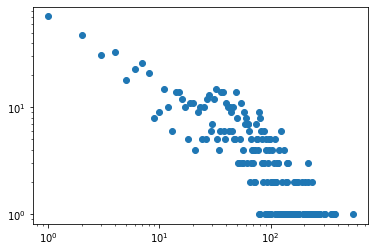

In [47]:
plot_degree_dist(graph_from_file("email-Eu-core.txt"))